

**Data Loading**



    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  
0        0            1  
1        0            1  
2        1            1  


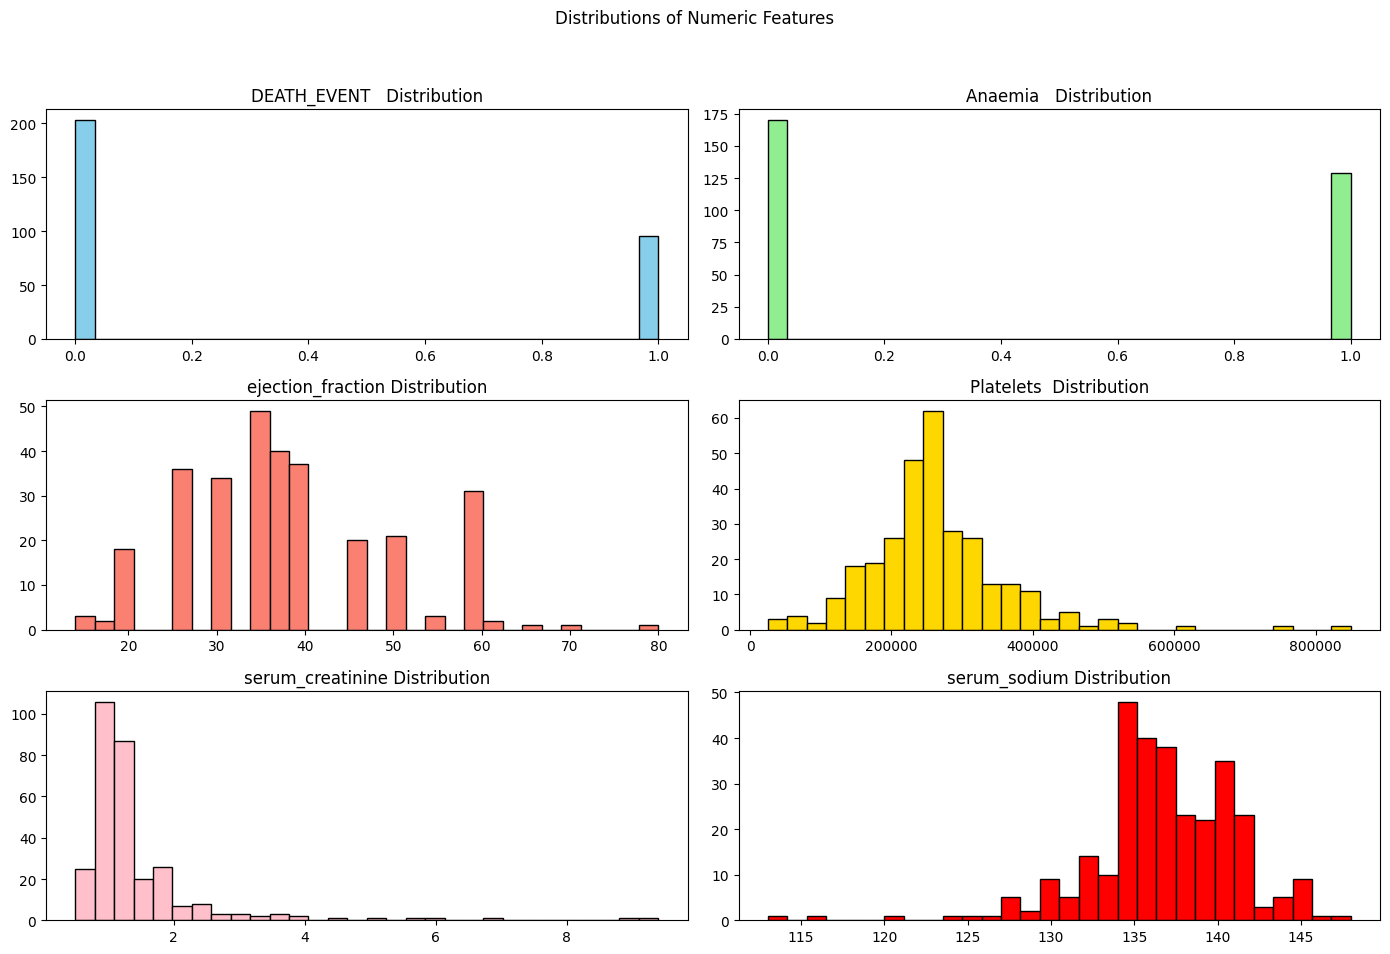

In [ ]:
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

# Load the heart.csv file without specifying the encoding
heart_data = pd.read_csv('/content/heart_failure_clinical_records_dataset2.csv')

# Show the head of the dataframe to understand its structure
print(heart_data.head())

# Plot distributions of numeric data to visualize the dataset
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.suptitle('Distributions of Numeric Features')

# DEATH_EVENT  distribution
axes[0, 0].hist(heart_data['DEATH_EVENT'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('DEATH_EVENT   Distribution')

# Anaemia   distribution
axes[0, 1].hist(heart_data['anaemia'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Anaemia   Distribution')

# ejection_fraction distribution
axes[1, 0].hist(heart_data['ejection_fraction'], bins=30, color='salmon', edgecolor='black')
axes[1, 0].set_title('ejection_fraction Distribution')

# Platelets  distribution
axes[1, 1].hist(heart_data['platelets'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Platelets  Distribution')

# serum_creatinine distribution
axes[2, 0].hist(heart_data['serum_creatinine'], bins=30, color='pink', edgecolor='black')
axes[2, 0].set_title('serum_creatinine Distribution')

# serum_sodium distribution
axes[2, 1].hist(heart_data['serum_sodium'], bins=30, color='red', edgecolor='black')
axes[2, 1].set_title('serum_sodium Distribution')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Clean the dataset by handling any incorrect or unnecessary data.

Scale the numerical features using StandardScaler.

Split the data into training and testing sets.

Build and train a neural network model on the training set.

Evaluate the model on the testing set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import numpy as np

# Clean the dataset by converting 'yes'/'no' to binary and 'furnishingstatus' to categorical
#heart_data['mainroad'] = heart_data['mainroad'].map({'yes': 1, 'no': 0})
#heart_data['guestroom'] = heart_data['guestroom'].map({'yes': 1, 'no': 0})
#heart_data['basement'] = heart_data['basement'].map({'yes': 1, 'no': 0})
#heart_data['hotwaterheating'] = heart_data['hotwaterheating'].map({'yes': 1, 'no': 0})
#heart_data['airconditioning'] = heart_data['airconditioning'].map({'yes': 1, 'no': 0})
#heart_data['prefarea'] = heart_data['prefarea'].map({'yes': 1, 'no': 0})
#heart_data = pd.get_dummies(heart_data, columns=['furnishingstatus'], drop_first=True)

# Scale the numerical features
scaler = StandardScaler()
numeric_features = ['anaemia', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','creatinine_phosphokinase','diabetes','ejection_fraction','sex','smoking']
heart_data[numeric_features] = scaler.fit_transform(heart_data[numeric_features])

# Split the data into training and testing sets
X = heart_data.drop('DEATH_EVENT', axis=1)
y = heart_data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a neural network model
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 1.0234522223028988
Root Mean Squared Error: 1.0116581548640324


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared, MSE, MAE, and RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# We already have MSE and RMSE from previous output, reusing those values
mse = 1.0234522223028988
rmse = 1.0116581548640324

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

R-squared: 0.08211786867631732
Mean Absolute Error: 0.8629128343991715
Mean Squared Error: 1.0234522223028988
Root Mean Squared Error: 1.0116581548640324


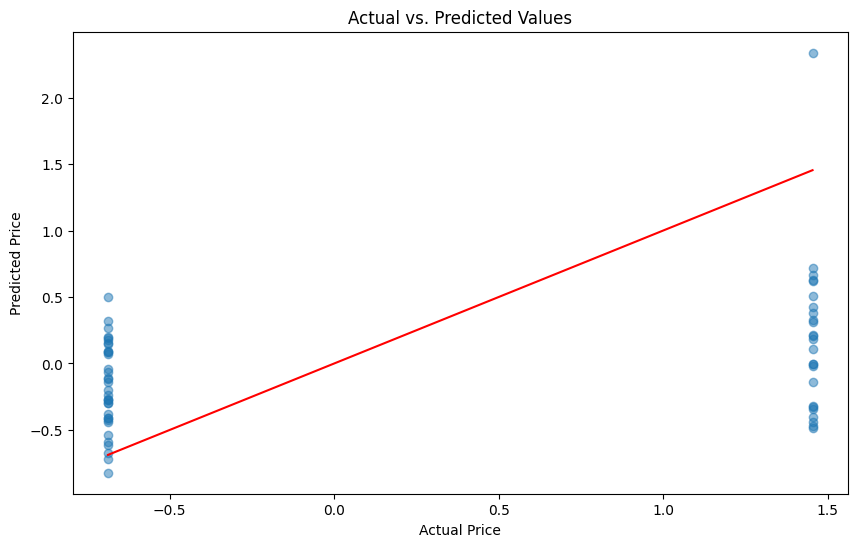

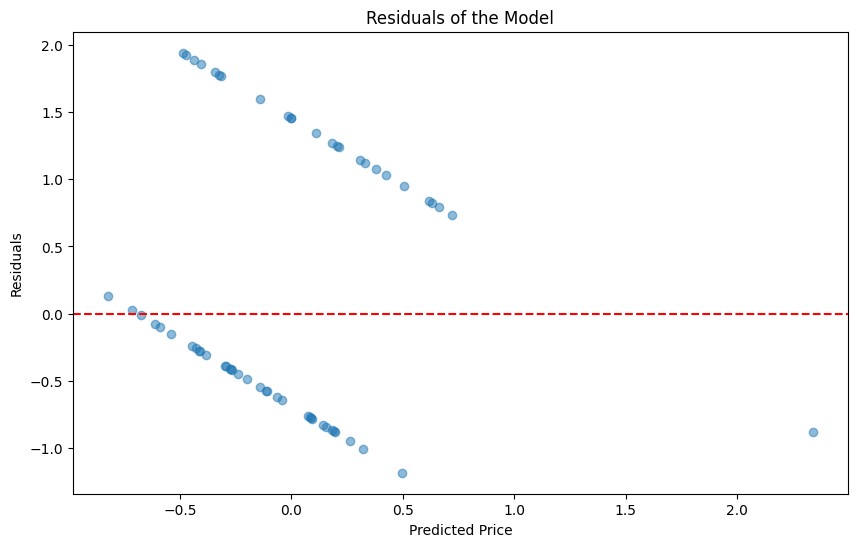

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect predictions
plt.show()

# Plot the residuals of the model
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals of the Model')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

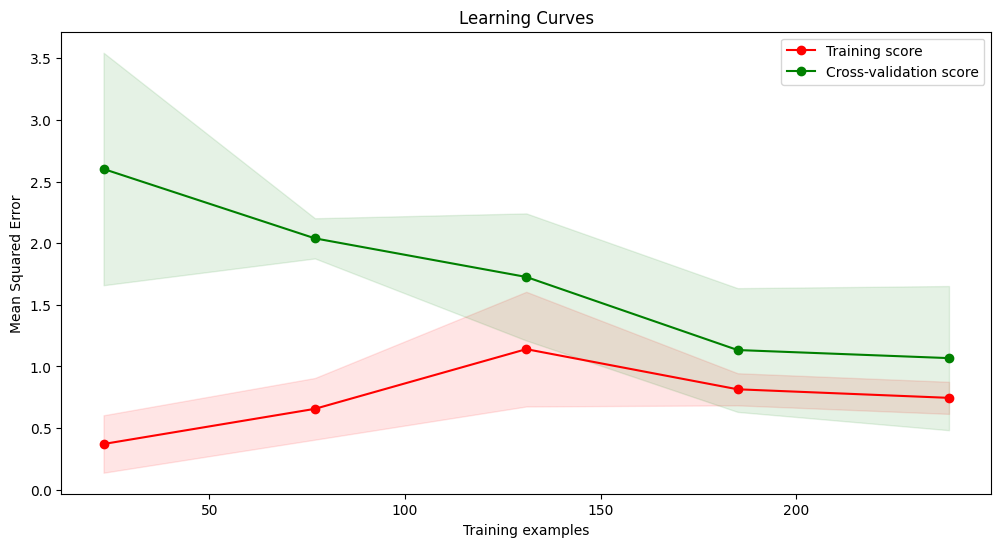

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curves for the training and validation sets
train_sizes, train_scores, test_scores = learning_curve(
    MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000),
    X, y, cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),
    return_times=False)

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc="best")
plt.show()